In [1]:

import argparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

def parse() -> argparse.Namespace:
    parser = argparse.ArgumentParser()

    parser.add_argument(
        "dataset",
        type=str,
        help="filename to get describe for"
    )
    return parser.parse_args()

In [2]:
csv_file = "dataset_train.csv"
# csv_file = "dataset_test.csv"
data = pd.read_csv(csv_file)

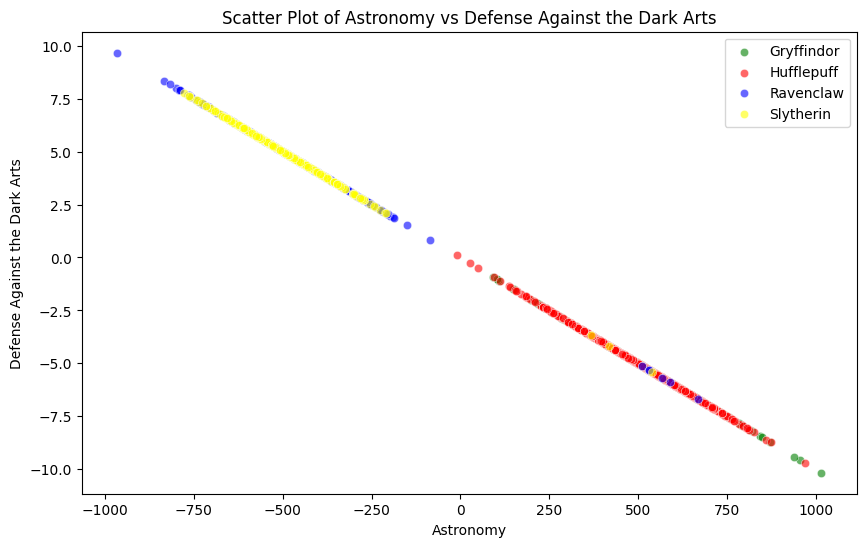

In [3]:
house_colors = {
    'Gryffindor': 'green',
    'Hufflepuff': 'red',
    'Ravenclaw': 'blue',
    'Slytherin': 'yellow'
}

df = data.select_dtypes(include=[float, int])
correlation_matrix = df.corr()
correlation_matrix_abs = correlation_matrix.abs()
for i in range(len(correlation_matrix_abs)):
    correlation_matrix_abs.iat[i, i] = 0
max_corr = correlation_matrix_abs.unstack().idxmax()

# Extract the two features with the highest correlation
feature1, feature2 = max_corr

# Plot the scatter plot
plt.figure(figsize=(10, 6))
for house, color in house_colors.items():
    subset = data[data['Hogwarts House'] == house]
    plt.scatter(subset[feature1], subset[feature2], alpha=0.6, edgecolors='w', linewidth=0.5, label=house, color=color)
plt.title(f'Scatter Plot of {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.show()

From the results extracted from the correlation matrix, we can  determine that Astronomy and DADA are the most similar features.